In [ ]:
numbers = "0123456789"

# проверяем, есть ли в n-грамме связь
def find_con(three_grams_gr, thr_gr,  word_spl, pos1, pos2):
    if word_spl[pos1][6] == word_spl[pos2][0]:
        conn = word_spl[pos2][3] + str(pos2) + "-" + word_spl[pos1][3] + str(pos1)
        if thr_gr in three_grams_gr.keys():
            if conn in three_grams_gr[thr_gr].keys():
                three_grams_gr[thr_gr][conn] = three_grams_gr[thr_gr][conn] + 1
            else:
                three_grams_gr[thr_gr][conn] = 1
        else:
            three_grams_gr[thr_gr] = {conn: 1}

# считаем n-граммы
def count_ngrams(textts, n1, n2, min_grams=0.005, min_acc=0.95, noms_count=0, cons_count=0):
    answered = []
    to_return = ""
    sum_cons = 0
    sum_noms = 0
    for n in range(n1, n2):
        n_grams_sum = {}
        n_grams_gr = {}
        n_grams_perc = {}
        answer = []
        for tx in textts:
            textt = open(tx)
            text_r = textt.readlines()
            for i in range(len(text_r) - 1, -1, -1):
                if text_r[i][0] in numbers and '.' in text_r[i].split('\t')[0]: # убираем лишние строчки
                    del text_r[i]
                elif text_r[i][0] in numbers and '-' in text_r[i].split('\t')[0]:
                    alen = int(text_r[i].split('\t')[0].split('-')[0])
                    blen = int(text_r[i].split('\t')[0].split('-')[1])
                    llen = blen - alen
                    for j in range(llen + 1, 0, -1):
                        if int(text_r[i+j].split('\t')[6]) >= alen and int(text_r[i+j].split('\t')[6]) <= blen:
                            del text_r[i+j]
                    del text_r[i]
            for i in range(len(text_r)): # находим n-граммы
                usl = text_r[i][0] in numbers
                for tt in range(n-1):
                    usl = usl and text_r[i+tt+1][0] in numbers
                if usl:
                    word_spl = []
                    for x in range(n):
                        word_spl.append(text_r[i+x].split('\t'))
                    n_gr = word_spl[0][3]
                    for x in range(n-1):
                        n_gr = n_gr + "-" + word_spl[x+1][3]
                    if n_gr in n_grams_sum.keys():
                        n_grams_sum[n_gr] = n_grams_sum[n_gr] + 1
                    else:
                        n_grams_sum[n_gr] = 1
                    for j in range(n):
                        for k in range(n):
                            find_con(n_grams_gr, n_gr,  word_spl, j, k)
        for i in n_grams_gr.keys(): # считаем устойчивойсть n-грамм
            for j in n_grams_gr[i].keys():
                gram = i + " " + j
                n_grams_perc[gram] = n_grams_gr[i][j]/n_grams_sum[i]
        n_grams_sorted = sorted(n_grams_perc.items(), key=lambda item: item[1], reverse = True)
        summa = 0
        for i in n_grams_sum.keys():
            summa = summa + n_grams_sum[i]
        for i in n_grams_sorted:
            n_g = i[0].split()
            answer.append([i, n_grams_sum[n_g[0]], n_grams_sum[n_g[0]]/summa])
        for i in answer:
            ssch = 0
            for kk in answered:
                if (kk[0] in i[0][0].split()[0]) and (i[0][0].split()[1].split("-")[0][:-1] + i[0][0].split()[1].split("-")[1][:-1] == kk[1].split("-")[0][:-1] + kk[1].split("-")[1][:-1]) and (int(i[0][0].split()[1].split("-")[0][-1]) - int(i[0][0].split()[1].split("-")[1][-1]) == int(kk[1].split("-")[0][-1]) - int(kk[1].split("-")[1][-1])):
                    ssch = 1
            if i[2] > min_grams and i[0][1] > min_acc and ssch == 0:
                answered.append((i[0][0].split()[0], i[0][0].split()[1]))
                if ssch == 0:
                    sum_cons = sum_cons + i[1]
                    sum_noms = sum_noms + 1
                    to_return = to_return + str(i) + "\n"
    to_return = to_return + str(sum_noms) + " " + str(sum_cons) + "\n\n"
    noms_count = sum_noms
    cons_count = sum_cons
    return([to_return, noms_count, cons_count])

In [ ]:
text_names = {
    'ru': ['ru_syntagrus-ud-train-a.conllu', 'ru_syntagrus-ud-train-b.conllu', 'ru_syntagrus-ud-train-c.conllu', 'ru_syntagrus-ud-test.conllu', 'ru_syntagrus-ud-dev.conllu'],
    'en': ['en_ewt-ud-train.conllu', 'en_ewt-ud-test.conllu', 'en_ewt-ud-dev.conllu'],
    'zh': ['zh_gsd-ud-train.conllu', 'zh_gsd-ud-test.conllu', 'zh_gsd-ud-dev.conllu'],
    'pt': ['pt_bosque-ud-train.conllu', 'pt_bosque-ud-test.conllu', 'pt_bosque-ud-dev.conllu'],
    'id': ['id_gsd-ud-train.conllu', 'id_gsd-ud-test.conllu', 'id_gsd-ud-dev.conllu'],
    'tr': ['tr_imst-ud-train.conllu', 'tr_imst-ud-test.conllu', 'tr_imst-ud-dev.conllu'],
    'ja': ['ja_gsd-ud-train.conllu', 'ja_gsd-ud-test.conllu', 'ja_gsd-ud-dev.conllu'],
    'vi': ['vi_vtb-ud-train.conllu', 'vi_vtb-ud-test.conllu', 'vi_vtb-ud-dev.conllu'],
    'es': ['es_ancora-ud-train.conllu', 'es_ancora-ud-test.conllu', 'es_ancora-ud-dev.conllu'],
    'fa': ['fa_seraji-ud-train.conllu', 'fa_seraji-ud-test.conllu', 'fa_seraji-ud-dev.conllu'],
    'lzh': ['lzh_kyoto-ud-train.conllu', 'lzh_kyoto-ud-test.conllu', 'lzh_kyoto-ud-dev.conllu'],
    'uk': ['uk_iu-ud-train.conllu', 'uk_iu-ud-test.conllu', 'uk_iu-ud-dev.conllu'],
    'fr': ['fr_gsd-ud-train.conllu', 'fr_gsd-ud-test.conllu', 'fr_gsd-ud-dev.conllu'],
    'hi': ['hi_hdtb-ud-train.conllu', 'hi_hdtb-ud-test.conllu', 'hi_hdtb-ud-dev.conllu'],
    'ko': ['ko_gsd-ud-train.conllu', 'ko_gsd-ud-test.conllu', 'ko_gsd-ud-dev.conllu'],
    'el': ['el_gdt-ud-train.conllu', 'el_gdt-ud-test.conllu', 'el_gdt-ud-dev.conllu'],
    'it': ['it_isdt-ud-train.conllu', 'it_isdt-ud-test.conllu', 'it_isdt-ud-dev.conllu'],
    'de': ['de_gsd-ud-train.conllu', 'de_gsd-ud-test.conllu', 'de_gsd-ud-dev.conllu'],
    'no': ['no_bokmaal-ud-train.conllu', 'no_bokmaal-ud-test.conllu', 'no_bokmaal-ud-dev.conllu'],
    'ro': ['ro_rrt-ud-train.conllu', 'ro_rrt-ud-test.conllu', 'ro_rrt-ud-dev.conllu'],
    'bg': ['bg_btb-ud-train.conllu', 'bg_btb-ud-test.conllu', 'bg_btb-ud-dev.conllu'],
    'sv': ['sv_talbanken-ud-train.conllu', 'sv_talbanken-ud-test.conllu', 'sv_talbanken-ud-dev.conllu'],
    'ar': ['ar_padt-ud-train.conllu', 'ar_padt-ud-test.conllu', 'ar_padt-ud-dev.conllu'],
    'pl': ['pl_pdb-ud-train.conllu', 'pl_pdb-ud-test.conllu', 'pl_pdb-ud-dev.conllu'],
    'he': ['he_htb-ud-train.conllu', 'he_htb-ud-test.conllu', 'he_htb-ud-dev.conllu'],
    'hy': ['hy_armtdp-ud-train.conllu', 'hy_armtdp-ud-test.conllu', 'hy_armtdp-ud-dev.conllu'],
    'nl': ['nl_alpino-ud-train.conllu', 'nl_alpino-ud-test.conllu', 'nl_alpino-ud-dev.conllu'],
    'fi': ['fi_tdt-ud-train.conllu', 'fi_tdt-ud-test.conllu', 'fi_tdt-ud-dev.conllu'],
    'da': ['da_ddt-ud-train.conllu', 'da_ddt-ud-test.conllu', 'da_ddt-ud-dev.conllu'],
    'lt': ['lt_alksnis-ud-train.conllu', 'lt_alksnis-ud-test.conllu', 'lt_alksnis-ud-dev.conllu'],
    'ur': ['ur_udtb-ud-train.conllu', 'ur_udtb-ud-test.conllu', 'ur_udtb-ud-dev.conllu'],
    'ca': ['ca_ancora-ud-train.conllu', 'ca_ancora-ud-test.conllu', 'ca_ancora-ud-dev.conllu'],
    'is': ['is_modern-ud-train.conllu', 'is_modern-ud-test.conllu', 'is_modern-ud-dev.conllu'],
    'grc': ['grc_perseus-ud-train.conllu', 'grc_perseus-ud-test.conllu', 'grc_perseus-ud-dev.conllu'],
    'et': ['et_edt-ud-train.conllu', 'et_edt-ud-test.conllu', 'et_edt-ud-dev.conllu'],
    'sr': ['sr_set-ud-train.conllu', 'sr_set-ud-test.conllu', 'sr_set-ud-dev.conllu'],
    'la': ['la_ittb-ud-train.conllu', 'la_ittb-ud-test.conllu', 'la_ittb-ud-dev.conllu'],
    'cu': ['cu_proiel-ud-train.conllu', 'cu_proiel-ud-test.conllu', 'cu_proiel-ud-dev.conllu'],
    'cy': ['cy_ccg-ud-train.conllu', 'cy_ccg-ud-test.conllu', 'cy_ccg-ud-dev.conllu'],
    'hyw': ['hyw_armtdp-ud-train.conllu', 'hyw_armtdp-ud-test.conllu', 'hyw_armtdp-ud-dev.conllu'],
    'be': ['be_hse-ud-train.conllu', 'be_hse-ud-test.conllu', 'be_hse-ud-dev.conllu'],
    'cs': ['cs_pdt-ud-train-ca.conllu', 'cs_pdt-ud-train-ct.conllu', 'cs_pdt-ud-train-la.conllu', 'cs_pdt-ud-train-lt.conllu', 'cs_pdt-ud-train-ma.conllu', 'cs_pdt-ud-train-mt.conllu', 'cs_pdt-ud-train-va.conllu', 'cs_pdt-ud-test.conllu', 'cs_pdt-ud-dev.conllu'],
    'orv': ['orv_ruthenian-ud-train.conllu', 'orv_ruthenian-ud-test.conllu', 'orv_ruthenian-ud-dev.conllu'],
    'eu': ['eu_bdt-ud-train.conllu', 'eu_bdt-ud-test.conllu', 'eu_bdt-ud-dev.conllu'],
    'fro': ['fro_profiterole-ud-train.conllu', 'fro_profiterole-ud-test.conllu', 'fro_profiterole-ud-dev.conllu'],
    'pcm': ['pcm_nsc-ud-train.conllu', 'pcm_nsc-ud-test.conllu', 'pcm_nsc-ud-dev.conllu'],
    'lv': ['lv_lvtb-ud-train.conllu', 'lv_lvtb-ud-test.conllu', 'lv_lvtb-ud-dev.conllu'],
    'got': ['got_proiel-ud-train.conllu', 'got_proiel-ud-test.conllu', 'got_proiel-ud-dev.conllu'],
    'xcl': ['xcl_caval-ud-train.conllu', 'xcl_caval-ud-test.conllu', 'xcl_caval-ud-dev.conllu'],
    'gl': ['gl_ctg-ud-train.conllu', 'gl_ctg-ud-test.conllu', 'gl_ctg-ud-dev.conllu'],
    'hr': ['hr_set-ud-train.conllu', 'hr_set-ud-test.conllu', 'hr_set-ud-dev.conllu']
}

In [ ]:
langgs = ['ru', 'en', 'zh', 'pt', 'id', 'tr', 'ja', 'vi', 'es', 'fa', 'lzh', 'uk', 'fr', 'hi', 'ko', 'el',
          'it', 'de', 'no', 'ro', 'bg', 'sv', 'ar', 'pl', 'he', 'hy', 'nl', 'fi', 'da', 'lt', 'ur', 'ca',
          'is', 'grc', 'et', 'sr', 'la', 'cu', 'cy', 'hyw', 'be', 'cs', 'orv', 'eu', 'fro', 'pcm', 'lv',
          'got', 'xcl', 'gl', 'hr']

In [ ]:
lang_names = {'ru': 'Russian', 'en': 'English', 'zh': 'Chinese', 'pt': 'Portuguese', 'id': 'Indonesian', 'tr': 'Turkish','ja': 'Japanese',
              'vi': 'Vietnamese', 'es': 'Spanish', 'fa': 'Persian', 'lzh': 'Classical Chinese', 'uk': 'Ukranian', 'fr': 'French', 'hi': 'Hindi',
              'ko': 'Korean', 'el': 'Greek', 'it': 'Italian', 'de': 'German', 'no': 'Norwegian', 'ro': 'Romanian', 'bg': 'Bulgarian', 'sv': 'Swedish',
              'ar': 'Arabic', 'pl': 'Polish', 'he': 'Hebrew', 'hy': 'Armenian', 'nl': 'Dutch', 'fi': 'Finnish', 'da': 'Danish', 'lt': 'Lithuanian', 'ur': 'Urdu',
              'ca': 'Catalan', 'is': 'Icelandic', 'grc': 'Ancient Greek', 'et': 'Estonian', 'sr': 'Serbian', 'la': 'Latin', 'cu': 'Old Church Slavonic',
              'cy': 'Welsh', 'hyw': 'Western Armenian', 'be': 'Belarusian', 'cs': 'Czech', 'orv': 'Old-East Slavic Ruthenian', 'eu': 'Basque',
              'fro': 'Old French', 'pcm': 'Naija', 'lv': 'Latvian', 'got': 'Gothic', 'xcl': 'Classical Armenian', 'gl': 'Galician', 'hr': 'Croatian'}


In [ ]:
numb_connects = {'ru': 1428347, 'en': 234871, 'zh': 118294, 'pt': 201601, 'id': 114232, 'tr': 50787,
                 'ja': 185554, 'vi': 54746, 'es': 529936, 'fa': 145628, 'lzh': 346929, 'uk': 115609,
                 'fr': 373025, 'hi': 335055, 'ko': 73983, 'el': 59252, 'it': 264257, 'de': 272131,
                 'no': 290177, 'ro': 208998, 'bg': 145011, 'sv': 90794, 'ar': 234392, 'pl': 325167,
                 'he': 108505, 'hy': 49720, 'nl': 195010, 'fi': 186812, 'da': 95221, 'lt': 66405,
                 'ur': 132947, 'ca': 514712, 'is': 76856, 'grc': 189070, 'et': 406857, 'sr': 93289,
                 'la': 423503, 'cu': 176215, 'cy': 48844, 'hyw': 114927, 'be': 279878, 'cs': 1415828,
                 'orv': 107075, 'eu': 112450, 'fro': 217550, 'pcm': 131596, 'lv': 308097, 'got': 49935,
                 'xcl': 83069, 'gl': 122018, 'hr': 190399}

In [ ]:
languages = []
accuracy = []
n_grams = []
with open("ngrams.txt", 'w') as ngrams_file:
    for langg in langgs:
        nncount = 0
        cccount = 0
        texts = text_names[langg]
        ngrams_file.write(lang_names[langg] + "\n")
        ret = count_ngrams(texts, 2, 6, 0.005, 0.95, nncount, cccount)
        ngrams_file.write(ret[0])
        languages.append(lang_names[langg])
        accuracy.append(int(ret[2])/numb_connects[langg])
        n_grams.append(int(ret[1]))

In [ ]:
max_n_gram_length_sl = {'ru': 3, 'en': 4, 'zh': 3, 'pt': 4, 'id': 5, 'tr': 3,
                 'ja': 4, 'vi': 3, 'es': 5, 'fa': 3, 'lzh': 3, 'uk': 3,
                 'fr': 4, 'hi': 4, 'ko': 3, 'el': 4, 'it': 4, 'de': 4,
                 'no': 4, 'ro': 3, 'bg': 4, 'sv': 3, 'ar': 5, 'pl': 4,
                 'he': 3, 'hy': 3, 'nl': 3, 'fi': 2, 'da': 4, 'lt': 4,
                 'ur': 4, 'ca': 5, 'is': 3, 'grc': 3, 'et': 4, 'sr': 3,
                 'la': 2, 'cu': 3, 'cy': 4, 'hyw': 3, 'be': 4, 'cs': 3,
                 'orv': 3, 'eu': 3, 'fro': 4, 'pcm': 4, 'lv': 3, 'got': 3,
                 'xcl': 5, 'gl': 4, 'hr': 3}

In [ ]:
max_n_gram_length = []
for lang in langgs:
    max_n_gram_length.append(max_n_gram_length_sl[lang])

In [ ]:
print(accuracy)

[0.1852799074734641, 0.14149895048771452, 0.01382149559571914, 0.40184820511803016, 0.26383150080537854, 0.0055329119656605035, 0.4097621177662567, 0.05852482373141417, 0.33865976268832465, 0.1482132556925866, 0.09483208379812584, 0.21477566625435737, 0.4132055492259232, 0.37650833445255255, 0.020720976440533636, 0.36164180112063726, 0.4757716919513958, 0.22987458246212303, 0.26063747299062295, 0.17920267179590235, 0.36693078456117123, 0.22703042051236866, 0.17464333253694667, 0.15703930595663151, 0.1280678309755311, 0.07276749798873693, 0.1831752217834983, 0.02871335888486821, 0.14933680595666923, 0.004773736917400798, 0.34220403619487466, 0.3431006077184911, 0.23921359425418964, 0.023932934891839, 0.045664693000243325, 0.2845565929530813, 0.047489628172645765, 0.10239763924751015, 0.40410285807878144, 0.07693579402577289, 0.19697153759852506, 0.16889057145359465, 0.13329908942330143, 0.10484659848821698, 0.3047805102275339, 0.1872777288063467, 0.0425093395911028, 0.10103134074296585,

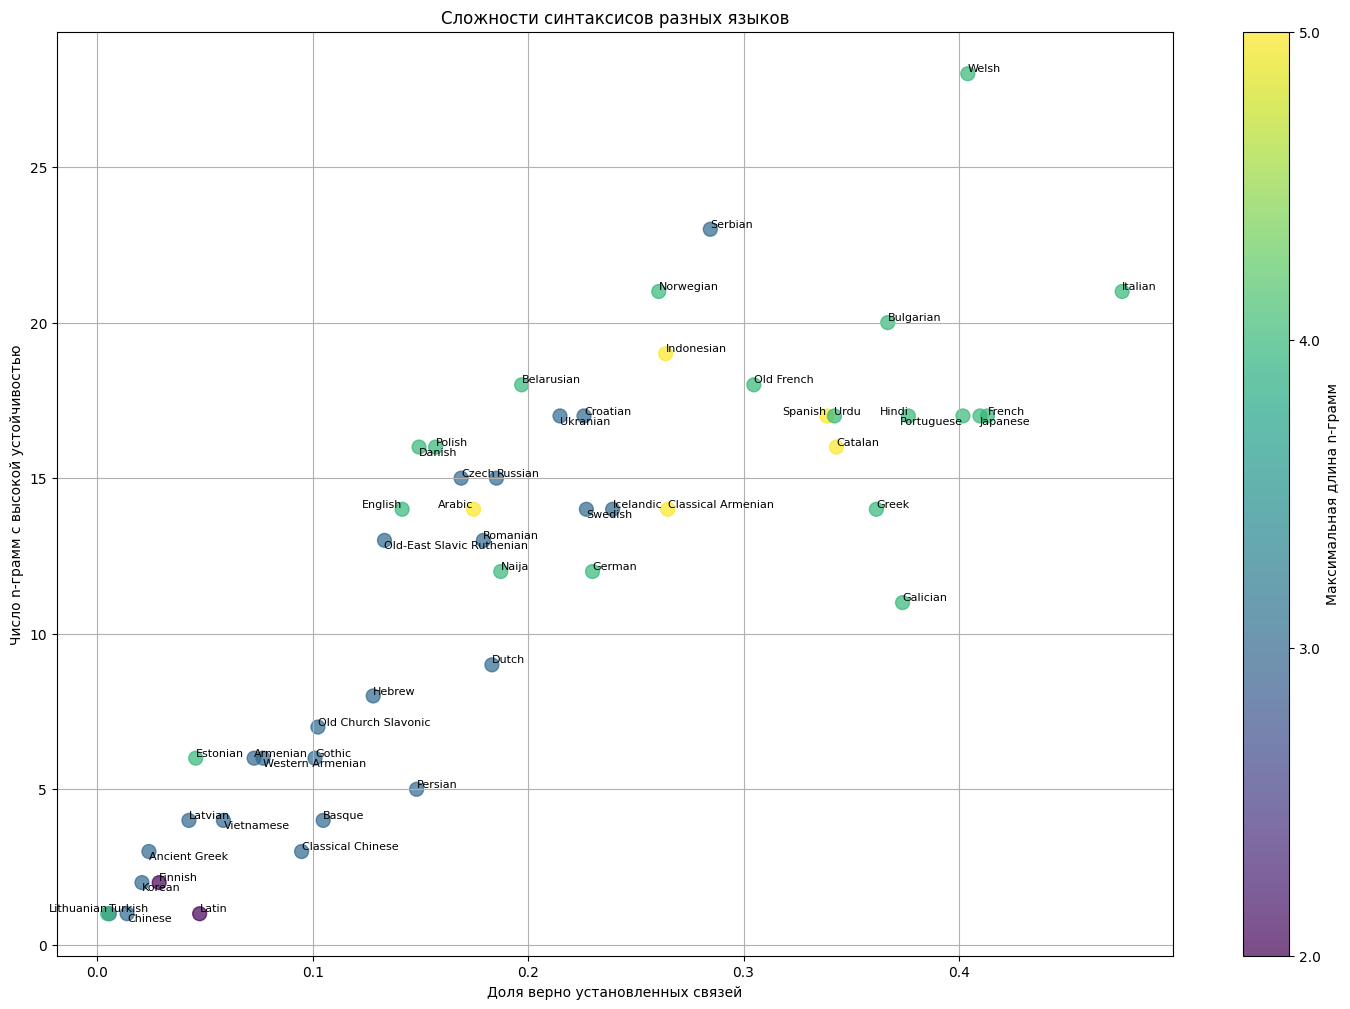

51


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize

min_length = min(max_n_gram_length)
max_length = max(max_n_gram_length)
norm = Normalize(vmin=2, vmax=5)
colors = plt.cm.viridis(norm((np.array(max_n_gram_length) - min_length) / (max_length - min_length) * (5 - 2) + 2))


plt.figure(figsize=(18, 12))
scatter = plt.scatter(accuracy, n_grams, c=colors, s=100, alpha=0.7)

for i, language in enumerate(languages):
    if language in ['Old-East Slavic Ruthenian', 'Swedish', 'Ancient Greek', 'Chinese', 'Danish', 'Japanese', 'Ukranian', 'Western Armenian', 'Vietnamese', 'Korean']:
        plt.annotate(language, (accuracy[i], n_grams[i]), fontsize=8, ha='left', va = 'top')
    elif language in ['English', 'Arabic', 'Lithuanian', 'Spanish', 'Hindi']:
        plt.annotate(language, (accuracy[i], n_grams[i]), fontsize=8, ha='right', va = 'bottom')
    elif language in ['Portuguese']:
        plt.annotate(language, (accuracy[i], n_grams[i]), fontsize=8, ha='right', va = 'top')
    else:
        plt.annotate(language, (accuracy[i], n_grams[i]), fontsize=8, ha='left', va = 'bottom')


plt.title('Сложности синтаксисов разных языков')
plt.xlabel('Доля верно установленных связей')
plt.ylabel('Число n-грамм с высокой устойчивостью')
plt.grid(True)
cbar = plt.colorbar(scatter, label='Максимальная длина n-грамм')
cbar.set_ticks(np.linspace(0, 1, num=4))
cbar.set_ticklabels(np.linspace(2, 5, num=4))

plt.show()
print(len(languages))

In [ ]:
numbers = "0123456789"

# считаем дисперсию
def count_disp(textts):
    vars_in_lang = {}
    for tx in textts:
        textt = open(tx)
        text_r = textt.readlines()
        for i in range(len(text_r) - 1, -1, -1):
            if text_r[i][0] in numbers and '.' in text_r[i].split('\t')[0]:
                del text_r[i]
            elif text_r[i][0] in numbers and '-' in text_r[i].split('\t')[0]:
                alen = int(text_r[i].split('\t')[0].split('-')[0])
                blen = int(text_r[i].split('\t')[0].split('-')[1])
                llen = blen - alen
                for j in range(llen + 1, 0, -1):
                    if int(text_r[i+j].split('\t')[6]) >= alen and int(text_r[i+j].split('\t')[6]) <= blen:
                        text_r[i+j].split('\t')[6] = '0'
                        text_r[i+j] = '\t'.join(text_r[i+j].split('\t'))
                del text_r[i]
        for i in range(len(text_r)): # находим расстояние между словами в связи
            if text_r[i][0] in numbers and text_r[i].split('\t')[6] != '0':
                num_zav = int(text_r[i].split('\t')[0])
                num_gl = int(text_r[i].split('\t')[6])
                pos_zav = text_r[i].split('\t')[3]
                pos_gl = text_r[i + num_gl - num_zav].split('\t')[3]
                con_name = pos_gl + "-" + pos_zav
                rasst = num_zav - num_gl
                if con_name in vars_in_lang.keys():
                    vars_in_lang[con_name]['disp'].append(rasst)
                    if rasst > 0:
                        vars_in_lang[con_name]['left_disp'].append(rasst)
                    else:
                        vars_in_lang[con_name]['right_disp'].append(rasst)
                else:
                    vars_in_lang[con_name] = {}
                    vars_in_lang[con_name]['disp'] = [rasst]
                    if rasst > 0:
                        vars_in_lang[con_name]['left_disp'] = [rasst]
                        vars_in_lang[con_name]['right_disp'] = []
                    else:
                        vars_in_lang[con_name]['right_disp'] = [rasst]
                        vars_in_lang[con_name]['left_disp'] = []
    return vars_in_lang

In [ ]:
vars = {}
for langg in langgs:
    texts = text_names[langg]
    vars[lang_names[langg]] = count_disp(texts)


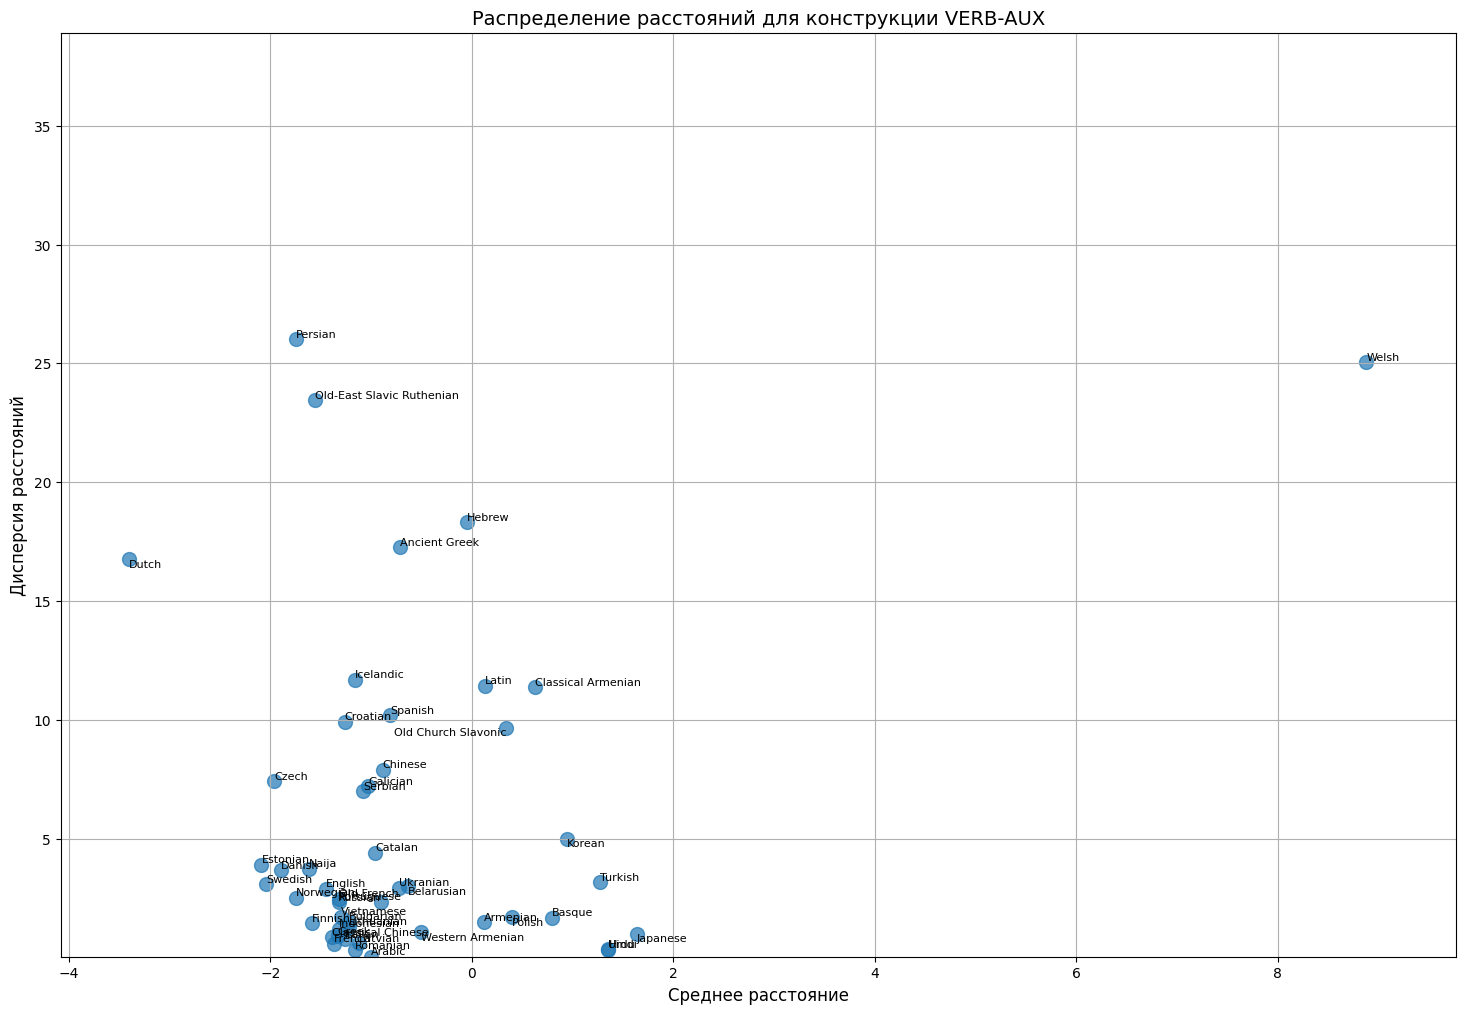

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

languages = []
means = []
variances = []

for lang in vars:
    if "VERB-AUX" in vars[lang]:
        distances = vars[lang]["VERB-AUX"]["disp"]
        if distances:
            languages.append(lang)
            means.append(np.mean(distances))
            variances.append(np.var(distances))

plt.figure(figsize=(18, 12))
plt.scatter(means, variances, s=100, alpha=0.7)

for i, lang in enumerate(languages):
    if lang in ['Belarusian', 'Japanese', 'Korean', 'Polish', 'Western Armenian', 'Dutch']:
        plt.annotate(lang, (means[i], variances[i]), fontsize=8, ha='left', va = 'top')
    elif lang in ['Russian']:
        plt.annotate(lang, (means[i], variances[i]), fontsize=8, ha='right', va = 'bottom')
    elif lang in ['Old Church Slavonic']:
        plt.annotate(lang, (means[i], variances[i]), fontsize=8, ha='right', va = 'top')
    else:
        plt.annotate(lang, (means[i], variances[i]), fontsize=8, ha='left', va='bottom')

plt.title('Распределение расстояний для конструкции VERB-AUX', fontsize=14)
plt.xlabel('Среднее расстояние', fontsize=12)
plt.ylabel('Дисперсия расстояний', fontsize=12)
plt.grid(True)
plt.xlim(min(means)*0.9, max(means)*1.1)
#plt.xlim(0.5, 2)
plt.ylim(min(variances)*0.9, max(variances)*1.1)
#plt.ylim(0, 30)
plt.show()


In [ ]:
import pandas as pd
import numpy as np

var_results = []
for i_lang, j_cons in vars.items():
    #print(i_lang, j_cons)
    lang_data = {"Language": i_lang}
    for k_con_name, l_dist in j_cons.items():
        #print(i_lang, j_cons)
        var_all = np.var(l_dist["disp"]) if l_dist["disp"] else np.nan
        var_left = np.var(l_dist["left_disp"]) if l_dist["left_disp"] else np.nan
        var_right = np.var(l_dist["right_disp"]) if l_dist["right_disp"] else np.nan
        lang_data[k_con_name] = f"{var_all:.2f}, {var_left:.2f}, {var_right:.2f}"
    var_results.append(lang_data)
df = pd.DataFrame(var_results)
df.set_index("Language", inplace=True)

In [ ]:
df

,NOUN-PUNCT,NOUN-NOUN,NOUN-ADJ,NOUN-PROPN,PROPN-PROPN,NOUN-AUX,VERB-PUNCT,NOUN-VERB,NOUN-ADP,VERB-NOUN,...,PUNCT-PRON,INTJ-SYM,SYM-X,PART-SYM,ADP-INTJ,INTJ-X,CCONJ-INTJ,SCONJ-NUM,SCONJ-PROPN,PUNCT-X
Language,,,,,,,,,,,,,,,,,,,,,
Russian,"35.58, 3.84, 45.49","12.06, 14.14, 9.93","2.62, 0.71, 18.33","5.43, 11.53, 3.86","7.90, 1.27, 7.77","8.20, 2.04, 8.48","105.60, 10.73, 93.42","25.85, 8.63, 18.13","0.85, 0.82, 1.36","19.73, 16.44, 5.58",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
English,"58.12, 5.42, 65.58","18.26, 5.58, 12.75","4.01, 1.26, 16.78","12.30, 3.78, 5.55","11.05, 0.65, 10.60","4.68, 3.44, 11.75","142.28, 15.11, 112.82","25.55, 16.62, 17.41","1.52, 1.41, 3.50","22.28, 18.21, 10.28",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Chinese,"33.76, 14.88, 29.06","20.38, 9.06, 22.52","5.09, 2.77, 27.45","7.97, 7.08, 1.78","14.34, 1.56, 14.14","18.65, 18.65, nan","142.63, 54.15, 103.38","56.09, 26.97, 88.11","9.64, 6.95, 0.73","48.50, 33.37, 21.37",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Portuguese,"71.40, 2.41, 95.50","18.11, 43.89, 12.91","2.97, 0.29, 2.30","12.38, 27.83, 7.55","24.93, 26.58, 24.77","2.60, 1.45, 32.38","193.07, 12.83, 178.52","29.21, 58.94, 23.47","0.61, 0.49, 3.91","38.36, 43.98, 10.31",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Indonesian,"63.38, 1.17, 73.78","18.33, 15.16, 16.80","3.61, 0.23, 3.34","15.42, 16.25, 9.75","20.91, 6.03, 20.80","0.73, 0.66, 0.00","138.35, 8.90, 111.56","54.42, 20.92, 53.58","0.61, 0.29, 5.35","25.65, 17.63, 13.60",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Turkish,"17.62, 23.48, 1.07","16.57, 8.94, 13.33","6.25, 3.15, 15.19","16.31, 14.98, 2.08","13.39, 3.45, 12.87","0.41, nan, 0.41","21.79, 33.40, 1.24","13.89, 9.69, 8.52","1.99, 13.86, 1.49","17.64, 14.06, 19.79",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Japanese,"4.12, 3.32, 1.71","10.43, 10.10, 5.11","5.25, 5.02, 2.16","5.54, 5.27, 8.68","2.90, 2.90, nan","0.77, 0.00, 0.74","2.43, 8.84, 2.26","17.95, 17.25, 0.57","0.28, nan, 0.28","49.38, 49.24, 1.11",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vietnamese,"40.88, 2.29, 52.23","7.43, 4.58, 5.41","3.25, 0.60, 2.35","3.41, 3.96, 2.65","3.99, 2.25, 3.06","0.57, 0.46, 0.22","91.76, 12.22, 66.77","7.75, 12.92, 6.57","0.47, 0.36, 1.10","17.51, 15.76, 3.99",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Spanish,"73.94, 4.82, 95.29","17.24, 42.04, 11.44","4.36, 0.74, 3.72","9.92, 60.78, 5.83","16.22, 27.84, 16.15","4.96, 1.55, 26.55","293.48, 14.59, 241.40","26.53, 54.00, 21.47","0.88, 0.70, 2.44","40.91, 42.72, 13.21",...,"0.00, nan, 0.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
from google.colab import files
df.to_csv('disp.csv', index=False)
files.download('disp.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
texts = text_names['pt']
count_ngrams(texts, 3, 4, 0.00001, 0.1)[0].split('\n')

["[('PUNCT-NUM-SYM SYM2-NUM1', 1.0), 25, 0.00012026631773399015]",
 "[('NUM-SYM-PUNCT SYM1-NUM0', 1.0), 75, 0.00036079895320197044]",
 "[('VERB-DET-PROPN PROPN2-DET1', 1.0), 185, 0.0008899707512315271]",
 "[('DET-PROPN-VERB PROPN1-DET0', 1.0), 497, 0.002390894396551724]",
 "[('NOUN-PROPN-PROPN PROPN1-PROPN2', 1.0), 464, 0.002232142857142857]",
 "[('DET-PROPN-AUX PROPN1-DET0', 1.0), 179, 0.0008611068349753695]",
 "[('CCONJ-PROPN-CCONJ PROPN1-CCONJ0', 1.0), 13, 6.253848522167488e-05]",
 "[('VERB-ADP-PROPN PROPN2-ADP1', 1.0), 302, 0.001452817118226601]",
 "[('VERB-AUX-VERB VERB2-AUX1', 1.0), 150, 0.0007215979064039409]",
 "[('AUX-DET-NOUN NOUN2-DET1', 1.0), 528, 0.002540024630541872]",
 "[('NOUN-VERB-NOUN VERB1-NOUN2', 1.0), 208, 0.0010006157635467981]",
 "[('ADJ-ADP-PROPN PROPN2-ADP1', 1.0), 151, 0.0007264085591133005]",
 "[('PUNCT-NOUN-ADJ NOUN1-ADJ2', 1.0), 264, 0.001270012315270936]",
 "[('AUX-PRON-VERB VERB2-AUX0', 1.0), 31, 0.0001491302339901478]",
 "[('AUX-PRON-VERB VERB2-PRON1', 1

In [ ]:
# находим предложения, в которых есть связь в нужной n-грамме
def find_ngrams(textts, ngram, connec, n=2):
    sentn = ""
    #ret = []
    for tx in textts:
        textt = open(tx)
        text_r = textt.readlines()
        for i in range(len(text_r)):
            usl = text_r[i][0] in numbers
            for tt in range(n-1):
                usl = usl and text_r[i+tt+1][0] in numbers
            if usl:
                word_spl = []
                n_grams_gr = {}
                for x in range(n):
                    word_spl.append(text_r[i+x].split('\t'))
                n_gr = word_spl[0][3]
                for x in range(n-1):
                    n_gr = n_gr + "-" + word_spl[x+1][3]
                if n_gr == ngram:
                    for j in range(n):
                        for k in range(n):
                            find_con(n_grams_gr, n_gr,  word_spl, j, k)
                for i in n_grams_gr.keys():
                    for j in n_grams_gr[i].keys():
                        if j == connec:
                            print(sentn)
                            #ret.append(sentn)
            elif "# text = " in text_r[i]:
                sentn = text_r[i]
    #return ret

In [ ]:
# находим предложения, в которой нет связи в нужной n-грамме
def find_not_ngrams(textts, ngram, connec, n=2):
    sentn = ""
    for tx in textts:
        textt = open(tx)
        text_r = textt.readlines()
        for i in range(len(text_r)):
            usl = text_r[i][0] in numbers
            for tt in range(n-1):
                usl = usl and text_r[i+tt+1][0] in numbers
            if usl:
                word_spl = []
                n_grams_gr = {}
                for x in range(n):
                    word_spl.append(text_r[i+x].split('\t'))
                n_gr = word_spl[0][3]
                for x in range(n-1):
                    n_gr = n_gr + "-" + word_spl[x+1][3]
                if n_gr == ngram:
                    for j in range(n):
                        for k in range(n):
                            find_con(n_grams_gr, n_gr,  word_spl, j, k)
                    for i in n_grams_gr.keys():
                        if connec not in n_grams_gr[i].keys():
                            print(sentn)
                    if n_grams_gr == {}:
                        print(sentn)
            elif "# text = " in text_r[i]:
                sentn = text_r[i]

In [ ]:
texts = ["it_isdt-ud-test.conllu"]
#texts = ["fr_gsd-ud-test.conllu"]
texts = ["pt_bosque-ud-test.conllu"]
#texts = ["ca_ancora-ud-test.conllu"]
#texts = ["es_ancora-ud-test.conllu"]
#texts = ["ro_rrt-ud-test.conllu"]
#texts = ["gl_ctg-ud-test.conllu"]
#texts = ["la_ittb-ud-test.conllu"]
find_not_ngrams(texts, "NOUN-ADP-NOUN", "NOUN0-NOUN2", n=3)

# text = Se o valor da compra for baixo, é melhor pedir encomenda por correio normal.

# text = Laser faz 12 páginas por minuto

# text = O empresário e corretor de imóveis, Roberto Capuano, foi reeleito pela terceira vez presidente do Conselho Regional de Corretores de Imóveis do Estado de São Paulo (Creci).

# text = Já estou trabalhando com as principais figuras da vida política do país com senadores e secretários de governo.

# text = A substância também é usada em vários medicamentos vendidos no Brasil, que dizem ser capazes de aliviar dores causadas por varizes e eliminar câimbras noturnas em pessoas que sofrem problemas de circulação nas pernas.

# text = Enfermeiro é uma designação válida apenas para quem concluiu o curso superior de enfermagem.

# text = Justiça impede exibição de desenho na TV

# text = A Liga de Assistência e Recuperação, órgão ligado à Prefeitura de Salvador, está desenvolvendo um projeto para a confecção de brinquedos a partir de sucatas.

# text = A Liga 

In [ ]:
texts = ["sr_set-ud-test.conllu"]
a = find_ngrams(texts, "VERB-AUX", "VERB0-AUX1", n=2)
b = find_ngrams(texts, "AUX-VERB", "VERB1-AUX0", n=2)
for i in a:
    if i in b:
        print(i)

# text = Rat koji je vodio NATO u Avganistanu i pojačana međunarodna saradnja posle napada 11.9. takođe su doprineli tome, rekao je de Keršov, belgijski naučni radnik i bivši zvaničnik vlade.

# text = Vojska te zemlje saopštila je da je uhapsila tri operativca Al Kaide visokog ranga u gradu Kueta na jugozapadu zemlje.

# text = "Oni su imali mogućnost da dođu do oružja, uključujući malo oružje i puškomitraljeze ili određene rakete zemlja-vazduh, koje su izuzetno opasne", rekao je de Keršov.

# text = Nisu nestali", rekao je britanski premijer Toni Bler.

# text = Predsednik Avganistana Hamid Karzai prisustvovao je poslednjoj sesiji samita i pozvao NATO da odmah uputi dodatne mirovne snage kako bi pomogao da se unapredi bezbednost u njegovoj zemlji uoči septembarskih predsedničkih i lokalnih izbora.

# text = Predsednik Branko Crvenkovski, član SDSM-a, rekao je da su, s obzirom da je ostalo samo 20 dana do aprilskog samita, razgovori sa Grčkom u "najdelikatnijoj fazi".

# text = "Ako s